In [2]:
import os

# Change the working directory
os.chdir("/Users/sbrya")

cwd = os.getcwd()
print(cwd)

c:\Users\sbrya


# Market Basket Analysis
### Read-in

First step is to read in the data and make sure it's present.

A: https://www.kaggle.com/datasets/akashdeepkuila/bakery

B: https://www.kaggle.com/datasets/akashdeepkuila/bakery

### Standard procedure for market basket analysis
1. Generate large set of rules
2. Filter rules using metrics
3. Apply intuition and common sense.


### If This, Then That
Market Basket Analysis delves into the rules of  *association* between the different items in a given customer's basket. For example, if a grocery store shopper buys bread, then they could be more likely to buy butter, or vice versa. The Market Basket Analysis allows us to determine the likelihood that the selection of one product, the **antecedent** $X$, leads to the selection of another item the **consequent** $Y$:

$X \rightarrow Y$

In [1]:
import pandas as pd

basket = {1:["milk", "egg", "bread", "butter"],
          2:["milk", "butter", "egg", "ketchup", "butter"],
          3:["bread", "butter", "ketchup"],
          4:["milk", "bread", "butter"],
          5:["bread", "butter", "cookies"],
          6:["milk", "bread", "butter", "cookies"],
          7:["milk", "cookies"],
          8:["milk", "bread", "butter"],
          9:["bread", "butter", "egg", "cookies"],
          10:["milk", "butter", "bread"],
          11:["milk", "bread"],
          12:["milk", "bread", "cookies", "ketchup"]}

[print(f"Transaction {i}:", basket[i]) for i in basket]

unique_items = set()
for items in basket.values():
  for item in items:
    unique_items.add(item)
print("\n\nUnique Items: ", list(unique_items))

Transaction 1: ['milk', 'egg', 'bread', 'butter']
Transaction 2: ['milk', 'butter', 'egg', 'ketchup', 'butter']
Transaction 3: ['bread', 'butter', 'ketchup']
Transaction 4: ['milk', 'bread', 'butter']
Transaction 5: ['bread', 'butter', 'cookies']
Transaction 6: ['milk', 'bread', 'butter', 'cookies']
Transaction 7: ['milk', 'cookies']
Transaction 8: ['milk', 'bread', 'butter']
Transaction 9: ['bread', 'butter', 'egg', 'cookies']
Transaction 10: ['milk', 'butter', 'bread']
Transaction 11: ['milk', 'bread']
Transaction 12: ['milk', 'bread', 'cookies', 'ketchup']


Unique Items:  ['butter', 'cookies', 'bread', 'egg', 'ketchup', 'milk']


{'milk': 9, 'egg': 3, 'bread': 10, 'butter': 10, 'ketchup': 3, 'cookies': 5}

### Frequency
$Frequency(X)$

In [32]:
item_frequency = {}
for key, value in basket.items():
    for item in value:
        if item in item_frequency:
            item_frequency[item] += 1
        else:
            item_frequency[item] = 1

df = pd.DataFrame({'item': list(item_frequency.keys()), 'frequency': list(item_frequency.values())})
df

,item,frequency
0,milk,9
1,egg,3
2,bread,10
3,butter,10
4,ketchup,3
5,cookies,5


### Support
$Support(X) = \frac{Frequency(X)}{N}$

$Support(X \rightarrow Y) = \frac{Frequency(X\&Y)}{N}$

Or more simply, the support of any item $X$ is the number of transactions with that item ($Frequency(X)$) divided by the total number of transactions $N$.

In [35]:
total_transactions = len(basket) # 12 transactions in the original market basket data

# Calculate support percentage
df['support'] = (df['frequency'] / total_transactions).round(2)

df

,item,frequency,support
0,milk,9,0.75
1,egg,3,0.25
2,bread,10,0.83
3,butter,10,0.83
4,ketchup,3,0.25
5,cookies,5,0.42


### Confidence
##### $Confidence(X \rightarrow Y) = \frac{Support(X \& Y)}{Support(X)}$

The probability that Item $Y$ will be purchased, given the purchase of Item $X$.

### Lift
$Lift(X \rightarrow Y) = \frac{Support(X \rightarrow Y)}{Support(X) \times Support(Y)}$

### Leverage


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Bakery Sales Data

This dataset covers transactions from a Korean bakery, and comes from Kaggle: https://www.kaggle.com/datasets/hosubjeong/bakery-sales/data

In [4]:
import pandas as pd

# Load the dataset
bakery_data = pd.read_csv('Downloads/Bakery Sales.csv')

# Check the first few rows of the dataset
print(bakery_data.head())
print(bakery_data.info())
print(bakery_data.describe(include='all'))

           datetime day of week    total place  angbutter  plain bread  jam  \
0  2019-07-11 15:35        Thur  23800.0   NaN        1.0          NaN  NaN   
1  2019-07-11 16:10        Thur  15800.0   NaN        1.0          NaN  NaN   
2  2019-07-12 11:49         Fri  58000.0   NaN        NaN          NaN  NaN   
3  2019-07-13 13:19         Sat  14800.0   NaN        1.0          1.0  NaN   
4  2019-07-13 13:22         Sat  15600.0   NaN        2.0          NaN  NaN   

   americano  croissant  caffe latte  ...  gateau chocolat  pandoro  \
0        1.0        NaN          NaN  ...              NaN      NaN   
1        NaN        NaN          NaN  ...              NaN      NaN   
2        NaN        NaN          NaN  ...              NaN      NaN   
3        NaN        NaN          NaN  ...              NaN      NaN   
4        NaN        NaN          NaN  ...              NaN      NaN   

   cheese cake  lemon ade  orange pound  wiener  vanila latte  berry ade  \
0          NaN        

We can see that the basket data has already been set to a wide format, where each bakery item has been encoded in a numeric fashion. Each row covers a separate transaction, and can include multiple items. There are instances of multiple transactions occuring at the same time, but this seems to be due to the bakery data covering multiple store locations; some of the locations also probably have multiple POS systems, which can explain instances of different tranactions occuring at the same time and location.

In [21]:
print(bakery_data[['datetime', 'place']].value_counts().sort_values(ascending=False), "\n\n")
print(bakery_data[(bakery_data.datetime == "2019-10-03 14:50") & (bakery_data.place == "후평 2동")].to_markdown())

datetime          place
2019-10-03 14:50  후평 2동    2
2019-10-21 11:27  강남동      2
2020-04-02 13:12  석사동      2
2020-03-01 11:06  동면       2
2020-02-02 11:05  동면       2
                          ..
2020-05-01 15:03  동면       1
2020-05-01 15:19  동면       1
2020-05-02 11:37  동면       1
2020-05-02 11:39  후평 1동    1
2020-05-02 14:45  효자 1동    1
Name: count, Length: 2158, dtype: int64 


|     | datetime         | day of week   |   total | place    |   angbutter |   plain bread |   jam |   americano |   croissant |   caffe latte |   tiramisu croissant |   cacao deep |   pain au chocolat |   almond croissant |   croque monsieur |   mad garlic |   milk tea |   gateau chocolat |   pandoro |   cheese cake |   lemon ade |   orange pound |   wiener |   vanila latte |   berry ade |   tiramisu |   merinque cookies |
|----:|:-----------------|:--------------|--------:|:---------|------------:|--------------:|------:|------------:|------------:|--------------:|---------------------:|-------------:|--

|     | datetime         | day of week   |   total | place    |   angbutter |   plain bread |   jam |   americano |   croissant |   caffe latte |   tiramisu croissant |   cacao deep |   pain au chocolat |   almond croissant |   croque monsieur |   mad garlic |   milk tea |   gateau chocolat |   pandoro |   cheese cake |   lemon ade |   orange pound |   wiener |   vanila latte |   berry ade |   tiramisu |   merinque cookies |
|----:|:-----------------|:--------------|--------:|:---------|------------:|--------------:|------:|------------:|------------:|--------------:|---------------------:|-------------:|-------------------:|-------------------:|------------------:|-------------:|-----------:|------------------:|----------:|--------------:|------------:|---------------:|---------:|---------------:|------------:|-----------:|-------------------:|
| 684 | 2019-10-03 14:50 | Thur          |   21800 | 후평 2동 |           1 |             1 |   nan |         nan |           1 |           nan |

In [15]:
print(bakery_data.place.value_counts().sort_values(ascending=False))

print(print(bakery_data.place.unique()))

place
동면       416
후평 2동    254
후평 3동    249
후평 1동    196
석사동      169
퇴계동      146
효자 2동    143
소양동      132
신사우동      91
효자 3동     80
교동        65
강남동       52
효자 1동     50
조운동       37
동내면       31
근화동       29
약사명동      23
교동         2
신동면        1
Name: count, dtype: int64
[nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']
None


In [6]:
print(data.columns)

Index(['datetime', 'day of week', 'total', 'place', 'angbutter', 'plain bread',
       'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant',
       'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur',
       'mad garlic', 'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake',
       'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade',
       'tiramisu', 'merinque cookies'],
      dtype='object')


In [7]:
# Select columns related to items (food items)
item_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 
                'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 
                'croque monsieur', 'mad garlic', 'milk tea', 'gateau chocolat', 'pandoro', 
                'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 
                'berry ade', 'tiramisu', 'merinque cookies']

# Create a basket where each column represents an item and 1 indicates a purchase of that item
basket = data[item_columns].applymap(lambda x: 1 if x > 0 else 0)

# Show the first few rows of the basket (binarized)
print(basket.head())


   angbutter  plain bread  jam  americano  croissant  caffe latte  \
0          1            0    0          1          0            0   
1          1            0    0          0          0            0   
2          0            0    0          0          0            0   
3          1            1    0          0          0            0   
4          1            0    0          0          0            0   

   tiramisu croissant  cacao deep  pain au chocolat  almond croissant  ...  \
0                   1           0                 0                 0  ...   
1                   1           0                 0                 0  ...   
2                   1           0                 0                 0  ...   
3                   0           0                 0                 0  ...   
4                   1           0                 0                 0  ...   

   gateau chocolat  pandoro  cheese cake  lemon ade  orange pound  wiener  \
0                0        0            

C:\Users\sbrya\AppData\Local\Temp\ipykernel_33352\1431436239.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = data[item_columns].applymap(lambda x: 1 if x > 0 else 0)


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.1 (10%)
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=4000)

# Show the first 10 association rules
print(rules.head(10).to_markdown())


|    | antecedents                       | consequents                       |   antecedent support |   consequent support |   support |   confidence |    lift |   representativity |   leverage |   conviction |   zhangs_metric |   jaccard |   certainty |   kulczynski |
|---:|:----------------------------------|:----------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-------------------:|-----------:|-------------:|----------------:|----------:|------------:|-------------:|
|  0 | frozenset({'angbutter'})          | frozenset({'plain bread'})        |             0.743406 |             0.322909 |  0.24416  |     0.328434 | 1.01711 |                  1 | 0.00410735 |      1.00823 |      0.0655604  |  0.296975 |  0.00815996 |     0.54228  |
|  1 | frozenset({'plain bread'})        | frozenset({'angbutter'})          |             0.322909 |             0.743406 |  0.24416  |     0.756126 | 1.01711 |                  1 | 0.00410

c:\Users\sbrya\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


|    | antecedents                       | consequents                       |   antecedent support |   consequent support |   support |   confidence |    lift |   representativity |   leverage |   conviction |   zhangs_metric |   jaccard |   certainty |   kulczynski |
|---:|:----------------------------------|:----------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-------------------:|-----------:|-------------:|----------------:|----------:|------------:|-------------:|
|  0 | frozenset({'angbutter'})          | frozenset({'plain bread'})        |             0.743406 |             0.322909 |  0.24416  |     0.328434 | 1.01711 |                  1 | 0.00410735 |      1.00823 |      0.0655604  |  0.296975 |  0.00815996 |     0.54228  |
|  1 | frozenset({'plain bread'})        | frozenset({'angbutter'})          |             0.322909 |             0.743406 |  0.24416  |     0.756126 | 1.01711 |                  1 | 0.00410735 |      1.05216 |      0.0248451  |  0.296975 |  0.0495719  |     0.54228  |
|  2 | frozenset({'angbutter'})          | frozenset({'americano'})          |             0.743406 |             0.155237 |  0.122833 |     0.165231 | 1.06437 |                  1 | 0.00742903 |      1.01197 |      0.235705   |  0.158329 |  0.0118296  |     0.478246 |
|  3 | frozenset({'americano'})          | frozenset({'angbutter'})          |             0.155237 |             0.743406 |  0.122833 |     0.791262 | 1.06437 |                  1 | 0.00742903 |      1.22926 |      0.0715947  |  0.158329 |  0.186505   |     0.478246 |
|  4 | frozenset({'angbutter'})          | frozenset({'croissant'})          |             0.743406 |             0.281462 |  0.210249 |     0.282818 | 1.00482 |                  1 | 0.00100813 |      1.00189 |      0.0186869  |  0.258094 |  0.0018873  |     0.514903 |
|  5 | frozenset({'croissant'})          | frozenset({'angbutter'})          |             0.281462 |             0.743406 |  0.210249 |     0.746988 | 1.00482 |                  1 | 0.00100813 |      1.01416 |      0.00667321 |  0.258094 |  0.0139589  |     0.514903 |
|  6 | frozenset({'angbutter'})          | frozenset({'tiramisu croissant'}) |             0.743406 |             0.293519 |  0.226451 |     0.304612 | 1.03779 |                  1 | 0.00824664 |      1.01595 |      0.141924   |  0.279405 |  0.0157018  |     0.538057 |
|  7 | frozenset({'tiramisu croissant'}) | frozenset({'angbutter'})          |             0.293519 |             0.743406 |  0.226451 |     0.771502 | 1.03779 |                  1 | 0.00824664 |      1.12296 |      0.051547   |  0.279405 |  0.109495   |     0.538057 |
|  8 | frozenset({'angbutter'})          | frozenset({'pain au chocolat'})   |             0.743406 |             0.221176 |  0.165787 |     0.223011 | 1.0083  |                  1 | 0.00136419 |      1.00236 |      0.0320685  |  0.207547 |  0.00235619 |     0.486292 |
|  9 | frozenset({'pain au chocolat'})   | frozenset({'angbutter'})          |             0.221176 |             0.743406 |  0.165787 |     0.749574 | 1.0083  |                  1 | 0.00136419 |      1.02463 |      0.0105654  |  0.207547 |  0.0240377  |     0.486292 |

In [32]:
cols = ['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']

for col in cols:
    print(col, "\n---\n", \
        rules[['antecedents', 'consequents', col]].sort_values(col, ascending=False).head(20), '\n')

support 
---
              antecedents           consequents   support
0            (angbutter)         (plain bread)  0.244160
1          (plain bread)           (angbutter)  0.244160
6            (angbutter)  (tiramisu croissant)  0.226451
7   (tiramisu croissant)           (angbutter)  0.226451
4            (angbutter)           (croissant)  0.210249
5            (croissant)           (angbutter)  0.210249
8            (angbutter)    (pain au chocolat)  0.165787
9     (pain au chocolat)           (angbutter)  0.165787
10           (angbutter)        (orange pound)  0.152977
11        (orange pound)           (angbutter)  0.152977
2            (angbutter)           (americano)  0.122833
3            (americano)           (angbutter)  0.122833
14         (plain bread)           (croissant)  0.103617
15           (croissant)         (plain bread)  0.103617
12           (angbutter)              (wiener)  0.100603
13              (wiener)           (angbutter)  0.100603 

confidence 
---

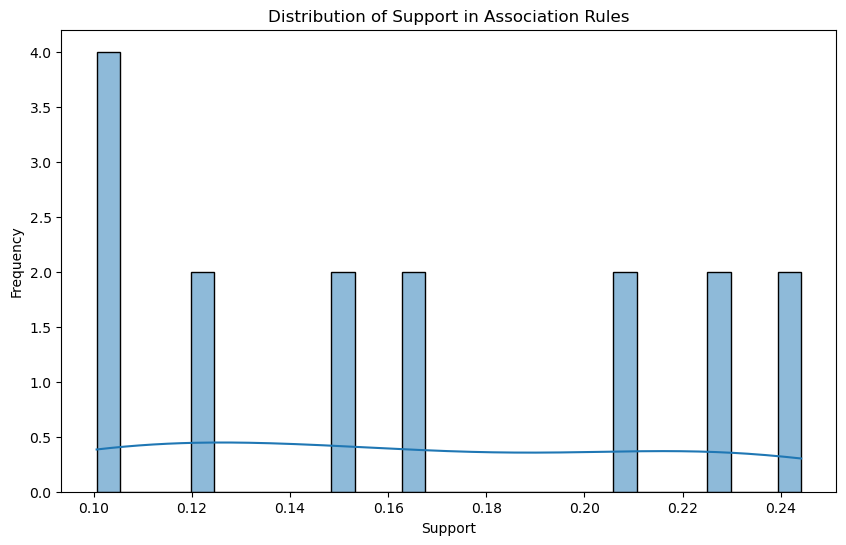

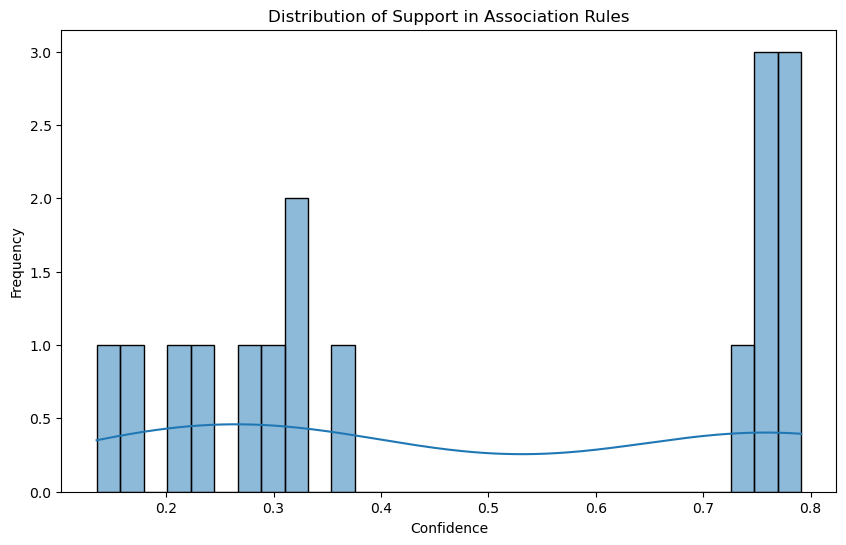

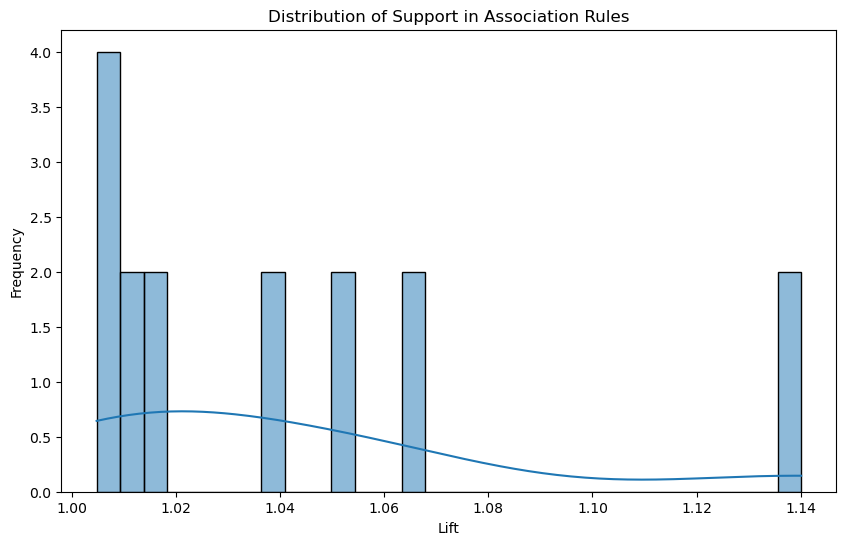

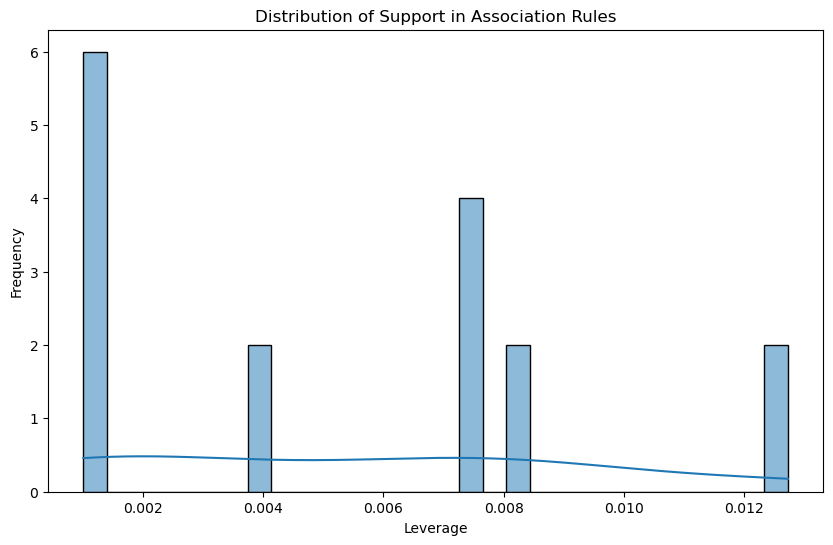

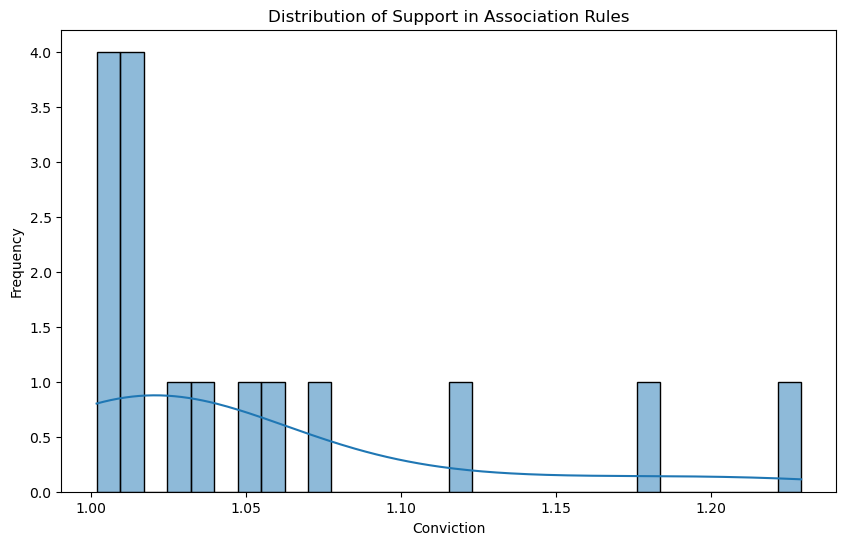

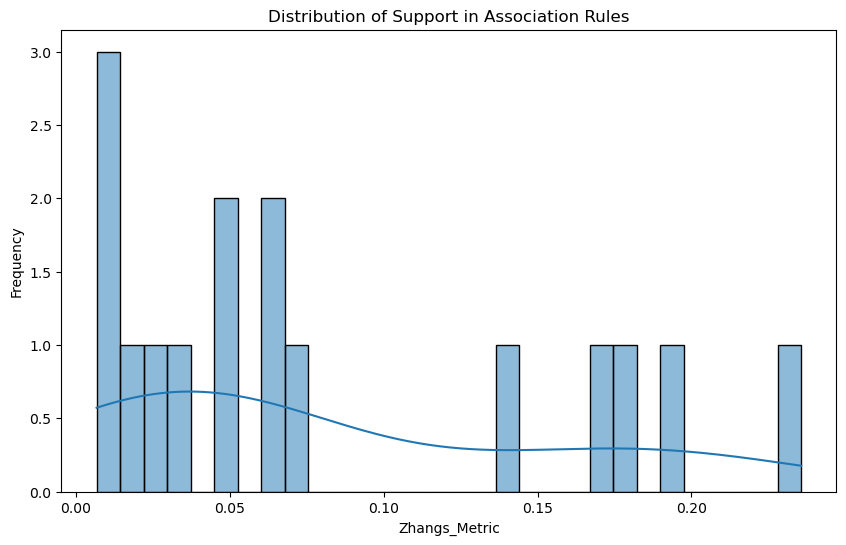

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(rules[col], bins=30, kde=True)
    plt.title('Distribution of Support in Association Rules')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.show()




In [19]:
# Filter rules with high lift (greater than 2) and confidence (greater than 0.5)
high_lift_rules = rules[(rules['lift'] > 1.0) & (rules['confidence'] > 0.5)]

# Show the filtered high-quality rules
print(high_lift_rules)

             antecedents  consequents  antecedent support  consequent support  \
1          (plain bread)  (angbutter)            0.322909            0.743406   
3            (americano)  (angbutter)            0.155237            0.743406   
5            (croissant)  (angbutter)            0.281462            0.743406   
7   (tiramisu croissant)  (angbutter)            0.293519            0.743406   
9     (pain au chocolat)  (angbutter)            0.221176            0.743406   
11        (orange pound)  (angbutter)            0.195554            0.743406   
13              (wiener)  (angbutter)            0.133760            0.743406   

     support  confidence      lift  representativity  leverage  conviction  \
1   0.244160    0.756126  1.017110               1.0  0.004107    1.052157   
3   0.122833    0.791262  1.064374               1.0  0.007429    1.229263   
5   0.210249    0.746988  1.004818               1.0  0.001008    1.014157   
7   0.226451    0.771502  1.037793     